# Overview

This notebook is divided in two parts, both can be run using Databricks, but for academics purposes I have split it into two parts: 

PART I - Databricks: this first part will show how to create and query a table or DataFrame that was uploaded to DBFS by Databricks. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from. Moreover, it is performed a pre-processing of data and EDA on the dataframe using Spark.

PART II - Jupyter Notebook: this second part is based on the extraction from Databricks of the first part, its main focus is on aplying a Sentiment Analysis forecast oat 1 week, 1 month and 3 months going forward.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

# PART I - Databricks

In [1]:
# File location and type
file_location = "/FileStore/tables/elonmusk_tweets.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

NameError: name 'spark' is not defined

In [0]:
# Create a view or table

temp_table_name = "elonmusk_tweets_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `elonmusk_tweets_csv`

id,created_at,text
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
848988730585096192,2017-04-03 20:01:01,"""b""""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past"
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"""b""""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""""""
848415731502923777,2017-04-02 06:04:07,"""b""""@Lexxxzis It's just a helicopter in helicopter's clothing"""""""
848415356263702528,2017-04-02 06:02:38,"""b""""@verge It won't matter"""""""
848398971139629057,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good'
848244577521647616,2017-04-01 18:44:01,"""b""""Why did we waste so much time developing silly rockets? Damn you"
848243350993895424,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation'


In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "elonmusk_tweets_csv"

#df.write.format("parquet").saveAsTable(permanent_table_name)

### Park SQL

In [0]:
%sql
-- Count the number of tweets in the dataset
SELECT COUNT(*) AS number_of_tweets from `elonmusk_tweets_csv`

number_of_tweets
2819


In [0]:
%sql
DESCRIBE `elonmusk_tweets_csv`

col_name,data_type,comment
id,string,null
created_at,string,null
text,string,null


In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.getOrCreate()

# Load the transformed dataset
df = spark.table("elonmusk_tweets_csv")

In [0]:
# Describe the data
df.describe().show()

+-------+--------------------+-------------------+--------------------+
|summary|                  id|         created_at|                text|
+-------+--------------------+-------------------+--------------------+
|  count|                2819|               2819|                2819|
|   mean|5.804847875852467...|               null|                null|
| stddev|2.186403946478833...|               null|                null|
|    min|  142179928203460608|2010-06-04 18:31:57|"b"".@benmacy $30...|
|    max|  849636868052275200|2017-04-05 14:56:29|b'wow https://t.c...|
+-------+--------------------+-------------------+--------------------+



In [0]:
# understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)



In [0]:
# Find duplicates
duplicate_count = df.count() - df.dropDuplicates().count()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


In [0]:
# Look for unique values
unique_values = df.select([countDistinct(col).alias(col) for col in df.columns])
unique_values.show()

# Plot the unique values
for col in df.columns:
    if col != "CreatedAt":  # Exclude non-numeric columns
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df.toPandas(), x=col)
        plt.title(f"Distribution of {col}")
        plt.show()

+----+----------+----+
|  id|created_at|text|
+----+----------+----+
|2819|      2819|2815|
+----+----------+----+



In [0]:
from pyspark.sql.functions import count, when, col

# Find null values
null_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
null_values.show()

# Replace null values
df_filled = df.fillna("N/A")  # Replace null values with "N/A"

+---+----------+----+----------+
| id|created_at|text|tweet_date|
+---+----------+----+----------+
|  0|         0|   0|         0|
+---+----------+----+----------+



# 2. PART II

## 2.1 Imports

In [173]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime
import numpy as np
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from pylab import rcParams

df_filled = pd.read_csv('export.csv')
df_2 = df_filled.copy()

df_2.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"""b""""@ForIn2020 @waltmossberg @mims @defcon_5 E..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"""b""""@DaveLeeBBC @verge Coal is dying due to na..."


## 2.2 Feature Engineering

### 2.2.1 Feature Modification

In [174]:
# Definition desgined to delete special characters
def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
    text=re.sub(r'"b""','',text) ##remove "b" from text which is part of HTML language
    text=re.sub(r'b','',text) ##remove b from text which is part of HTML language
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text

df_2['text']=df_2['text'].apply(clean_text)   ## applying function

## Clean Textc
df_2

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,'And so the roots spared humanity ...
1,848988730585096192,2017-04-03 20:01:01,_5 Exactly. Tesla is asurdly overvalued if ...
2,848943072423497728,2017-04-03 16:59:35,"' _5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,Coal is dying due to nat gas fracking. It's ...
...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,'That was a total non sequitur tw'
2815,142880871391838208,2011-12-03 08:20:28,"'Great Voltaire quote, argualy etter than Twai..."
2816,142188458125963264,2011-12-01 10:29:04,'I made the volume on the Model S go to 11. ...
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride umper cars on i...


In [175]:
# Lower case every letter in the tweet
df_2['text'] = df_2.text.str.lower()
df_2.head(10)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,'and so the roots spared humanity ...
1,848988730585096192,2017-04-03 20:01:01,_5 exactly. tesla is asurdly overvalued if ...
2,848943072423497728,2017-04-03 16:59:35,"' _5 et tu, walt?'"
3,848935705057280001,2017-04-03 16:30:19,'stormy weather in shortville ...'
4,848416049573658624,2017-04-02 06:05:23,coal is dying due to nat gas fracking. it's ...
5,848415731502923777,2017-04-02 06:04:07,it's just a helicopter in helicopter's clothi...
6,848415356263702528,2017-04-02 06:02:38,"it won't matter"""""""
7,848398971139629057,2017-04-02 04:57:31,' pretty good'
8,848244577521647616,2017-04-01 18:44:01,why did we waste so much time developing silly...
9,848243350993895424,2017-04-01 18:39:09,'technology reakthrough: turns out chemtrails ...


In [176]:
# Change from String to DateFormat the columns that represents a date
df_2['created_at'] = pd.to_datetime(df_2['created_at']).dt.date

### 2.2.2 Feature Creation

In [177]:
# Sorting feature by date, it is important for a better visualization in a TimeSeries
df_2 = df_2.sort_values(by='created_at')

## Feature Creation
# Create features that derive from columns that represents that date in each the tweet was published
df_2['year']         = pd.DatetimeIndex(df_2['created_at']).year
df_2['month']        = pd.DatetimeIndex(df_2['created_at']).month
df_2['day']          = pd.DatetimeIndex(df_2['created_at']).day
df_2['day_of_year']  = pd.DatetimeIndex(df_2['created_at']).dayofyear
df_2['quarter']      = pd.DatetimeIndex(df_2['created_at']).quarter

#Create features based on the text of the tweet
df_2['num_words'] = df_2['text'].str.split().str.len()  ##Number of words
df_2['num_characters'] = df_2['text'].str.len()  ##Number of characters
df_2['mean_characters'] = round(df_2['num_characters'] / df_2['num_words'],2) ##Average number of characters per word

## 2.3 Sentiment Analysis

### 2.3.1 Define Subjectivity and Polarity

In [178]:
# Define Subjetivity - it represents the level of subjectivity/objectivity of the text in the tweet
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Define Polarity - it represents the level of positiveness/negativeness (sentiment level) of the text in the tweet
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

#Create the features based on the fuctions designed
df_2['subjectivity'] = df_2['text'].apply(getTextSubjectivity)
df_2['polarity'] = df_2['text'].apply(getTextPolarity)

In [179]:
df_2.head()

,id,created_at,text,year,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity
2818,15434727182,2010-06-04,"'please ignore prior tweets, as that was someo...",2010,6,4,155,2,17,93,5.47,0.366667,0.166667
2817,142179928203460608,2011-12-01,went to iceland on sat to ride umper cars on i...,2011,12,1,335,4,12,53,4.42,0.000000,0.000000
2816,142188458125963264,2011-12-01,'i made the volume on the model s go to 11. ...,2011,12,1,335,4,21,99,4.71,0.000000,0.000000
2815,142880871391838208,2011-12-03,"'great voltaire quote, argualy etter than twai...",2011,12,3,337,4,21,136,6.48,0.850000,0.437500
2814,142881284019060736,2011-12-03,'that was a total non sequitur tw',2011,12,3,337,4,7,34,4.86,0.750000,0.000000


### 2.3.2 Define a Score

In [180]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [181]:
#Create the feature score based on the values of 'polarity'
df_2['score'] = df_2['polarity'].apply(getTextAnalysis)
df_2.head()

,id,created_at,text,year,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity,score
2818,15434727182,2010-06-04,"'please ignore prior tweets, as that was someo...",2010,6,4,155,2,17,93,5.47,0.366667,0.166667,Positive
2817,142179928203460608,2011-12-01,went to iceland on sat to ride umper cars on i...,2011,12,1,335,4,12,53,4.42,0.000000,0.000000,Neutral
2816,142188458125963264,2011-12-01,'i made the volume on the model s go to 11. ...,2011,12,1,335,4,21,99,4.71,0.000000,0.000000,Neutral
2815,142880871391838208,2011-12-03,"'great voltaire quote, argualy etter than twai...",2011,12,3,337,4,21,136,6.48,0.850000,0.437500,Positive
2814,142881284019060736,2011-12-03,'that was a total non sequitur tw',2011,12,3,337,4,7,34,4.86,0.750000,0.000000,Neutral


In [182]:
ax1.head(10)

,created_at,id,year,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity,sub_score
0,2010-06-04,1.543473e+10,2010.0,6.0,4.0,155.0,2.0,17.000000,93.000000,5.470000,0.366667,0.166667,Subjective
1,2011-12-01,1.421842e+17,2011.0,12.0,1.0,335.0,4.0,16.500000,76.000000,4.565000,0.000000,0.000000,Objective
2,2011-12-03,1.428811e+17,2011.0,12.0,3.0,337.0,4.0,14.000000,85.000000,5.670000,0.800000,0.218750,Subjective
3,2011-12-04,1.431711e+17,2011.0,12.0,4.0,338.0,4.0,12.000000,77.000000,6.420000,0.645000,0.480000,Subjective
4,2011-12-21,1.494677e+17,2011.0,12.0,21.0,355.0,4.0,15.571429,86.428571,5.921429,0.363492,0.071429,Subjective
5,2011-12-22,1.497635e+17,2011.0,12.0,22.0,356.0,4.0,13.333333,68.666667,4.153333,0.166667,-0.166667,Subjective
6,2011-12-24,1.503889e+17,2011.0,12.0,24.0,358.0,4.0,16.000000,100.333333,6.270000,0.380000,0.283333,Subjective
7,2011-12-26,1.512993e+17,2011.0,12.0,26.0,360.0,4.0,11.666667,67.000000,5.176667,0.188492,-0.002646,Subjective
8,2011-12-27,1.517810e+17,2011.0,12.0,27.0,361.0,4.0,16.000000,97.500000,6.125000,0.350000,0.200000,Subjective
9,2011-12-28,1.521540e+17,2011.0,12.0,28.0,362.0,4.0,7.500000,37.500000,4.445000,0.812500,-0.187500,Subjective


In [183]:
ax1 = df_2.groupby(by=["created_at"]).mean()
ax1 = ax1.reset_index()
ax1.head()

,created_at,id,year,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity
0,2010-06-04,1.543473e+10,2010.0,6.0,4.0,155.0,2.0,17.000000,93.000000,5.470000,0.366667,0.166667
1,2011-12-01,1.421842e+17,2011.0,12.0,1.0,335.0,4.0,16.500000,76.000000,4.565000,0.000000,0.000000
2,2011-12-03,1.428811e+17,2011.0,12.0,3.0,337.0,4.0,14.000000,85.000000,5.670000,0.800000,0.218750
3,2011-12-04,1.431711e+17,2011.0,12.0,4.0,338.0,4.0,12.000000,77.000000,6.420000,0.645000,0.480000
4,2011-12-21,1.494677e+17,2011.0,12.0,21.0,355.0,4.0,15.571429,86.428571,5.921429,0.363492,0.071429


## 2.4 EDA

### 2.4.1 Polarity

#### 2.4.1.1 All-time basis analysis

In [184]:
fig = px.line(ax1, x='created_at', y='polarity', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [185]:
df = px.data.iris()  # iris is a pandas DataFrame
fig = px.scatter(ax1, x="created_at", y="polarity")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [186]:
ax2.head()

,sub_score,created_at,id,year,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity
0,Objective,177,177,177,177,177,177,177,177,177,177,177,177
1,Subjective,721,721,721,721,721,721,721,721,721,721,721,721


#### 2.4.1.2 Year Analysis

In [187]:
df_year = df_2.groupby(by=["year"]).mean()
df_year = df_year.reset_index()
df_year.head()

,year,id,month,day,day_of_year,quarter,num_words,num_characters,mean_characters,subjectivity,polarity
0,2010,1.543473e+10,6.000000,4.000000,155.000000,2.000000,17.000000,93.000000,5.470000,0.366667,0.166667
1,2011,1.504237e+17,12.000000,23.659091,357.659091,4.000000,15.227273,87.840909,5.632955,0.376722,0.115176
2,2012,2.178620e+17,6.335443,16.417722,178.734177,2.484177,14.848101,85.325949,5.804778,0.400128,0.178227
3,2013,3.417404e+17,5.615063,15.255230,154.560669,2.163180,14.866109,84.882845,5.692238,0.350900,0.138702
4,2014,4.833604e+17,6.435345,15.922414,180.357759,2.482759,13.073276,77.732759,6.004095,0.325523,0.097856


In [188]:
import plotly.express as px

fig = px.scatter(df_year, x="year", y="polarity", trendline="ols")
fig.show()

### 2.4.2 Subjectivity

#### 2.4.2.1 All-time basis analysis

In [189]:
import plotly.express as px
import pandas as pd


fig = px.line(ax1, x='created_at', y='subjectivity', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [190]:
fig = px.scatter(ax1, x="created_at", y="subjectivity")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [191]:
def sub_score(row):
    if row['subjectivity'] > 0:
        return 'Subjective'
    return 'Objective'

ax1['sub_score'] = ax1.apply(lambda row: sub_score(row), axis=1)


In [192]:
ax2 = ax1.groupby(by=["sub_score"]).count()
ax2 = ax2.reset_index()

fig = px.bar(ax2, x='sub_score', y='subjectivity',text_auto=True)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, textposition="outside")
fig.show()

In [193]:
fig = px.pie(ax2, values='subjectivity', names='sub_score')
fig.update_traces(textposition='inside', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

#### 2.4.2.2 Year Analysis

In [194]:
import plotly.express as px

fig = px.scatter(df_year, x="year", y="subjectivity", trendline="ols")
fig.show()

### 2.4.3 Score

In [195]:
ax3 = df_2.groupby(by=["score"]).count()
ax3 = ax3.reset_index()

fig = px.bar(ax3, x='score', y='polarity',text_auto=True)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, textposition="outside")
fig.show()

In [196]:
fig = px.pie(ax3, values='polarity', names='score')
fig.update_traces(textposition='inside', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [119]:
fig = px.scatter(ax1, x="polarity", y="subjectivity")
fig.show()

In [38]:
import plotly.graph_objects as go # or plotly.express as px
fig = px.line(ax1, x='created_at', y='polarity', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


C:\Users\fonsecab\AppData\Local\Temp/ipykernel_2704/3829093100.py:19: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



## 2.5 Time-Series Forecast

In [308]:
df_3 = df_2.groupby(by=["created_at"]).mean()
df_3.index = pd.to_datetime(df_3.index)
df_3 = df_3['polarity']
df_3

created_at
2010-06-04    0.166667
2011-12-01    0.000000
2011-12-03    0.218750
2011-12-04    0.480000
2011-12-21    0.071429
                ...   
2017-03-31    0.124621
2017-04-01    0.003333
2017-04-02    0.078125
2017-04-03    0.000000
2017-04-05    0.000000
Name: polarity, Length: 898, dtype: float64

In [309]:
mod = sm.tsa.statespace.SARIMAX(df_3,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\fonsecab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\fonsecab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0035      0.033     -0.105      0.916      -0.068       0.061
ma.L1         -1.0000      5.021     -0.199      0.842     -10.840       8.840
ar.S.L12      -0.5070      0.023    -21.639      0.000      -0.553      -0.461
sigma2         0.0738      0.370      0.199      0.842      -0.652       0.799


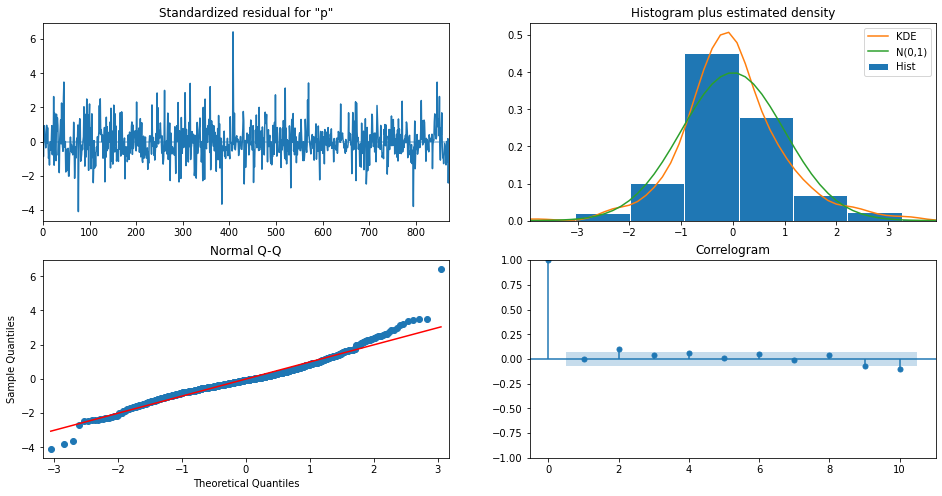

In [310]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### 2.5.1 One Week Forecast

In [311]:
start_date_1 = df_3.index.max() - pd.Timedelta(7, unit='d')
start_date_1

Timestamp('2017-03-29 00:00:00')

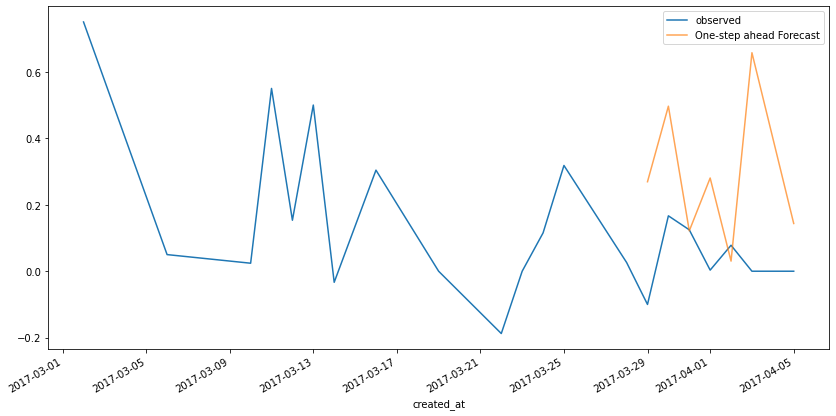

In [312]:
pred_1 = results.get_prediction(start=pd.to_datetime('2017-03-29'), dynamic=False)
pred_ci_1 = pred_1.conf_int()
ax_1 = df_3['2017-03-01':].plot(label='observed')
pred_1.predicted_mean.plot(ax=ax_1, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci_1.index,
                pred_ci_1.iloc[:, 0],
                pred_ci_1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
plt.legend()
plt.show()

In [329]:
forecasted_1 = pred_1.predicted_mean
truth_1 = df_3['2017-03-29':]
mse_1 = ((forecasted_1 - truth_1) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_1, 4)))

The Mean Squared Error of our forecasts is 0.111


In [330]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_1), 4)))

The Root Mean Squared Error of our forecasts is 0.3332


### 2.5.2 One Month Forecast

In [315]:
start_date_2 = df_3.index.max() - pd.Timedelta(30, unit='d')
start_date_2

Timestamp('2017-03-06 00:00:00')

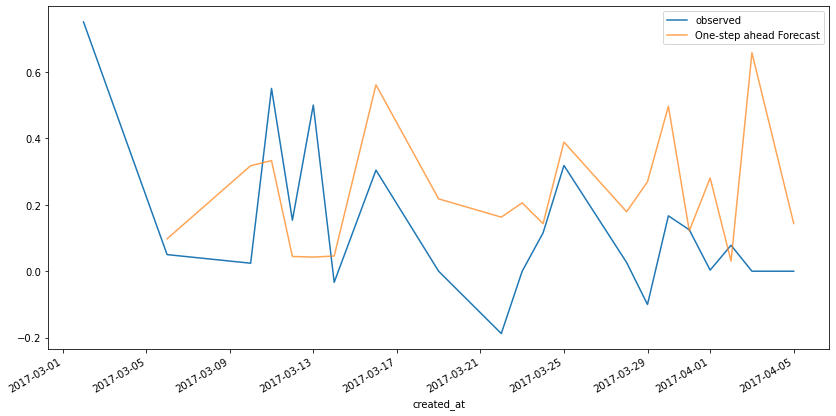

In [316]:
pred_2 = results.get_prediction(start=pd.to_datetime('2017-03-06'), dynamic=False)
pred_ci_2 = pred_2.conf_int()
ax_2 = df_3['2017-03-01':].plot(label='observed')
pred_2.predicted_mean.plot(ax=ax_2, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci_2.index,
                pred_ci_2.iloc[:, 0],
                pred_ci_2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
plt.legend()
plt.show()

In [317]:
forecasted_2 = pred_2.predicted_mean
truth_2 = df_3['2017-03-06':]
mse_2 = ((forecasted_2 - truth_2) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_2, 4)))

The Mean Squared Error of our forecasts is 0.0723650305


In [318]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_2), 4)))

The Root Mean Squared Error of our forecasts is 0.27


### 2.5.1 Three Months Forecast

In [319]:
start_date_3 = df_3.index.max() - pd.Timedelta(90, unit='d')
start_date_3

Timestamp('2017-01-05 00:00:00')

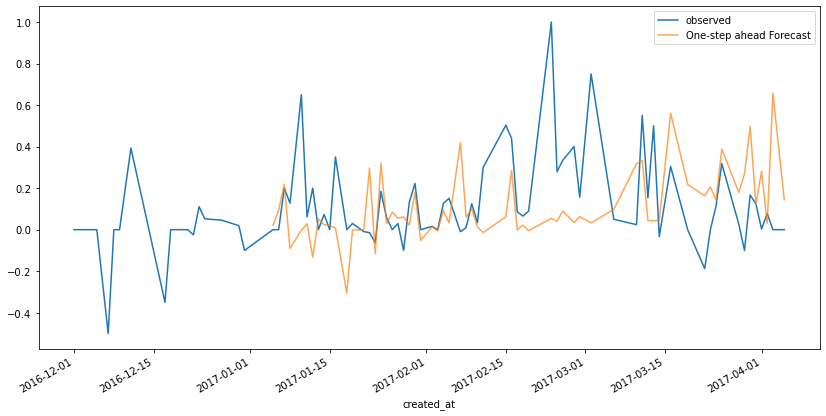

In [320]:
pred_3 = results.get_prediction(start=pd.to_datetime('2017-01-05'), dynamic=False)
pred_ci_3 = pred_3.conf_int()
ax_3 = df_3['2016-12-01':].plot(label='observed')
pred_3.predicted_mean.plot(ax=ax_3, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci_3.index,
                pred_ci_3.iloc[:, 0],
                pred_ci_3.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
plt.legend()
plt.show()

In [327]:
forecasted_3 = pred_3.predicted_mean
truth_3 = df_3['2017-01-05':]
mse_3 = ((forecasted_3 - truth_3) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_3, 4)))

The Mean Squared Error of our forecasts is 0.0724


In [328]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_3), 4)))

The Root Mean Squared Error of our forecasts is 0.269


### Comparing Performance

In [340]:
performance = { '1 Week' :[mse_1, np.sqrt(mse_1) ],
               '1 Month' :[mse_2, np.sqrt(mse_2) ],
               '3 Months' :[mse_3, np.sqrt(mse_3)]}

results = pd.DataFrame(data, index=['MSE', 'RMSE'])
results

,1 Week,1 Month,3 Months
MSE,0.111017,0.072365,0.072385
RMSE,0.333192,0.269007,0.269045


C:\Users\fonsecab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



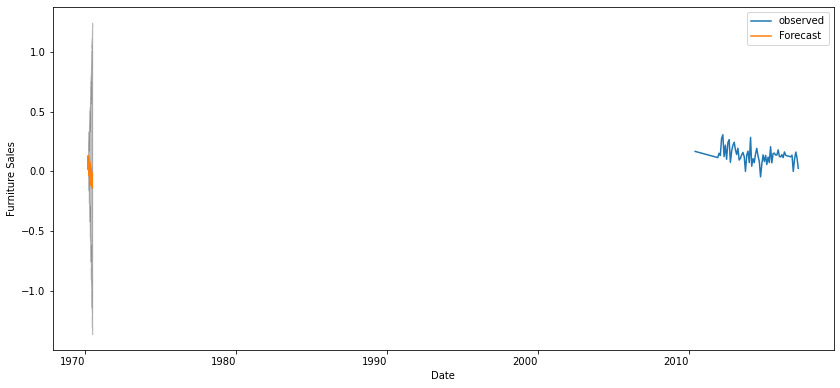

In [229]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()